## NEW REPLACEMENT
## Exploring ELI data frame
#### Ting-Wei Shen, tis50@pitt.edu, Mar19, 2019

### Loading choosed data

In [158]:
# Import all packages on top
import nltk, glob, re
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Turn off pretty printing 
%pprint

Pretty printing has been turned ON


In [339]:
sns.set_style('darkgrid')

- First, check about answer.csv

In [260]:
df_answer = pd.read_csv("./data/answer.csv")
print(df_answer.shape)
df_answer.head(10)

(46239, 6)


,answer_id,question_id,anon_id,user_file_id,text,is_deleted
0,1,5,eq0,7505,I met my friend Nife while I was studying in a...,0
1,2,5,am8,7506,"Ten years ago, I met a women on the train betw...",0
2,3,12,dk5,7507,In my country we usually don't use tea bags. F...,0
3,4,13,dk5,7507,I organized the instructions by time.,0
4,5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",0
5,6,13,ad1,7508,By time,0
6,7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",0
7,8,13,eg5,7509,"I organized the instructions by time, beacause...",0
8,9,12,ad1,7510,"First, prepare a port, loose tea, and cup.\nSe...",0
9,10,13,ad1,7510,By time,0


- I choose student_id(anon_id), question_id and text data to help me know the dataframe. Who write the essay with what kind of questions. 

- What we need are anon_id, question_id and text data.

In [261]:
df_eli = pd.DataFrame()
df_eli = df_answer[['anon_id', 'question_id', 'text']]
print(df_eli.shape)
df_eli.head()

(46239, 3)


,anon_id,question_id,text
0,eq0,5,I met my friend Nife while I was studying in a...
1,am8,5,"Ten years ago, I met a women on the train betw..."
2,dk5,12,In my country we usually don't use tea bags. F...
3,dk5,13,I organized the instructions by time.
4,ad1,12,"First, prepare a port, loose tea, and cup.\nSe..."


- Second, check about student information

In [262]:
df_student = pd.read_csv("./data/student_information.csv")
print(df_student.shape)
df_student.head()

(913, 21)


,anon_id,gender,birth_year,native_language,language_used_at_home,language_used_at_home_now,non_native_language_1,yrs_of_study_lang1,study_in_classroom_lang1,ways_of_study_lang1,...,yrs_of_study_lang2,study_in_classroom_lang2,ways_of_study_lang2,non_native_language_3,yrs_of_study_lang3,study_in_classroom_lang3,ways_of_study_lang3,createddate,modifieddate,course_history
0,ez9,Male,1978,Arabic,Arabic,NaN,English,more than 5 years,1.0,Studied grammar;Worked in pairs/groups;Studied...,...,less than 1 year,0.0,Studied by myself,NaN,NaN,0.0,NaN,2006-01-30 15:07:18,2006-03-14 15:13:37,6;12;18;24;30
1,gm3,Male,1980,Arabic,Arabic,NaN,English,more than 5 years,1.0,Studied grammar;Had a native-speaker teacher;S...,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,2006-01-30 15:07:28,2006-03-14 15:12:49,6;12;24;30;38
2,fg5,Male,1938,Nepali,Nepali,NaN,English,more than 5 years,1.0,Studied grammar;Worked in pairs/groups;Had a n...,...,less than 1 year,1.0,Studied grammar;Worked in pairs/groups;Had a n...,Hindi,more than 5 years,0.0,Studied by myself,2006-01-30 15:07:45,2006-03-14 15:11:36,18;24
3,ce5,Female,1984,Korean,Korean,NaN,English,more than 5 years,1.0,Studied grammar;Worked in pairs/groups;Had a n...,...,1-2 years,1.0,Studied grammar;Studied vocabulary;Listened to...,NaN,NaN,0.0,NaN,2006-01-30 15:07:49,2006-03-14 15:12:24,6;12;24;30;38;56
4,fi7,Female,1982,Korean,Korean;Japanese,NaN,English,more than 5 years,1.0,Studied grammar;Had a native-speaker teacher;S...,...,less than 1 year,1.0,Studied grammar;Studied vocabulary;Listened to...,French,1-2 years,1.0,Studied grammar;Studied vocabulary;Listened to...,2006-01-30 15:07:52,2006-03-14 15:12:17,6;12;24;30;38


- Let's merge student information

In [263]:
df_student_trim = df_student[['anon_id', 'gender', 'native_language']]
df_eli = pd.merge(df_eli, df_student_trim, on='anon_id', how='left')
print(df_eli.shape)
df_eli.head()

(46239, 5)


,anon_id,question_id,text,gender,native_language
0,eq0,5,I met my friend Nife while I was studying in a...,Male,Arabic
1,am8,5,"Ten years ago, I met a women on the train betw...",Female,Thai
2,dk5,12,In my country we usually don't use tea bags. F...,Female,Turkish
3,dk5,13,I organized the instructions by time.,Female,Turkish
4,ad1,12,"First, prepare a port, loose tea, and cup.\nSe...",Female,Korean


In [264]:
# Let's rename the column to help us recognize.
df_eli = df_eli.rename(columns={'anon_id':'student_id'})
df_eli.head()

,student_id,question_id,text,gender,native_language
0,eq0,5,I met my friend Nife while I was studying in a...,Male,Arabic
1,am8,5,"Ten years ago, I met a women on the train betw...",Female,Thai
2,dk5,12,In my country we usually don't use tea bags. F...,Female,Turkish
3,dk5,13,I organized the instructions by time.,Female,Turkish
4,ad1,12,"First, prepare a port, loose tea, and cup.\nSe...",Female,Korean


- The dataframe looks great.

- How about adding question column?

In [265]:
df_question = pd.read_csv("./data/question.csv")
print(df_question.shape)
df_question.head()

(6138, 16)


,question_id,question_type_id,user_file_id,question_category_id,question_parent_id,explanation,stem,choiceA,choiceB,choiceC,choiceD,allow_text,order_num,is_deleted,org_level,direction
0,1,2,7430,NaN,NaN,NaN,Answer the question. Write a complete sentenc...,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN
1,2,2,7430,NaN,NaN,NaN,Answer the question. Write a complete sentenc...,NaN,NaN,NaN,NaN,1,2,0,NaN,NaN
2,3,2,7430,NaN,NaN,NaN,Answer the question. Write a complete sentenc...,NaN,NaN,NaN,NaN,1,3,0,NaN,NaN
3,4,4,7495,NaN,NaN,NaN,Write an essay on ONE of the following topics....,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN
4,5,1,7496,NaN,NaN,NaN,Write a paragraph about a relatioship that is...,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN


- Select question_id and stem(question) only.

In [266]:
df_question_trim = df_question[['question_id', 'stem']]
df_question_trim = df_question_trim.rename(columns={'stem':'question'})
df_question_trim.head()

,question_id,question
0,1,Answer the question. Write a complete sentenc...
1,2,Answer the question. Write a complete sentenc...
2,3,Answer the question. Write a complete sentenc...
3,4,Write an essay on ONE of the following topics....
4,5,Write a paragraph about a relatioship that is...


In [267]:
df_eli = pd.merge(df_eli, df_question_trim, on='question_id', how='left')
print(df_eli.shape)
df_eli.head()

(46239, 6)


,student_id,question_id,text,gender,native_language,question
0,eq0,5,I met my friend Nife while I was studying in a...,Male,Arabic,Write a paragraph about a relatioship that is...
1,am8,5,"Ten years ago, I met a women on the train betw...",Female,Thai,Write a paragraph about a relatioship that is...
2,dk5,12,In my country we usually don't use tea bags. F...,Female,Turkish,"In five sentences or less, give instructions o..."
3,dk5,13,I organized the instructions by time.,Female,Turkish,"How do you organize the instructions: by time,..."
4,ad1,12,"First, prepare a port, loose tea, and cup.\nSe...",Female,Korean,"In five sentences or less, give instructions o..."


- Since it is private data, I just choose sample data - about 500 to represent.
- Then store the data as a new csv file.

In [272]:
#df_eli_short = df_eli.sample(500)

In [273]:
print(df_eli_short.shape)
df_eli_short.head()

(500, 6)


,student_id,question_id,text,gender,native_language,question
12023,ei8,1841,Resume,Female,Chinese,"In paragraphs 1-3, find a word or phrase that ..."
28582,fy1,3961,I would like to have my dreams explained becau...,Female,Spanish,Would you like to have your dreams interpreted...
10424,di3,1624,categorize,Male,Arabic,"assert, categorize, testify"
18409,ah8,2630,"After experimentation,Helva discovered that sh...",Male,Other,manipulate \nto control something using the ha...
8783,dy7,1399,"When I caught a cold, my body couldn't prevent...",Female,Korean,Describe a time when your immune system didn't...


- For the fair use, I have to eliminate personal information, so I just look through every text data. And mark the data with personal information.

In [296]:
# print all data with index count, mark the data with personal information
# just print first 5 to represent
# mark index 58,129,231,256,377,432
count = 0
for x in df_eli_short.text[:5]:
    print('----------------------------')
    print(count)
    print(x)
    count = count + 1

----------------------------
0
Resume 
----------------------------
1
I would like to have my dreams explained because I think this could me help to understand things that happened in my life.
----------------------------
2
categorize
----------------------------
3
After experimentation,Helva discovered that she could manipulate her diaphragmatic unit to sustain tone. By relaxing the throat muscles and expanding the oral cavity well into the frontal sinuses, she could direct the vowel sounds into the
----------------------------
4
When I caught a cold, my body couldn't prevent infection therefore I took some antibiotics for a couple of days.


- Drop personal information

In [308]:
#df_eli_short = df_eli_short.drop(df_eli_short.index[[58,129,231,256,377,432]])

- It looks like the dataframe is good

In [312]:
print(df_eli_short.shape)
df_eli_short.head()

(494, 6)


,student_id,question_id,text,gender,native_language,question
12023,ei8,1841,Resume,Female,Chinese,"In paragraphs 1-3, find a word or phrase that ..."
28582,fy1,3961,I would like to have my dreams explained becau...,Female,Spanish,Would you like to have your dreams interpreted...
10424,di3,1624,categorize,Male,Arabic,"assert, categorize, testify"
18409,ah8,2630,"After experimentation,Helva discovered that sh...",Male,Other,manipulate \nto control something using the ha...
8783,dy7,1399,"When I caught a cold, my body couldn't prevent...",Female,Korean,Describe a time when your immune system didn't...


- save the file as sample data

In [310]:
#df_eli_short.to_csv("./data/df_eli_short.csv")

## Linguistic Analysis
### 1. Text length as token count
- Let's count text length
- In this part, nltk.word_tokenize return error caused by the wrong input first. That is because some text is stored in "float" type, and word_tokenize only accepts "string" format. I have to set every text into "string" format first, then utilize word_tokenize().

In [313]:
def getTokens2(txt):
    txt = str(txt)
    x = nltk.word_tokenize(txt)
    return x

In [314]:
df_eli_short['tokens'] = df_eli_short.text.map(getTokens2)

In [315]:
df_eli_short.head()

,student_id,question_id,text,gender,native_language,question,tokens
12023,ei8,1841,Resume,Female,Chinese,"In paragraphs 1-3, find a word or phrase that ...",[Resume]
28582,fy1,3961,I would like to have my dreams explained becau...,Female,Spanish,Would you like to have your dreams interpreted...,"[I, would, like, to, have, my, dreams, explain..."
10424,di3,1624,categorize,Male,Arabic,"assert, categorize, testify",[categorize]
18409,ah8,2630,"After experimentation,Helva discovered that sh...",Male,Other,manipulate \nto control something using the ha...,"[After, experimentation, ,, Helva, discovered,..."
8783,dy7,1399,"When I caught a cold, my body couldn't prevent...",Female,Korean,Describe a time when your immune system didn't...,"[When, I, caught, a, cold, ,, my, body, could,..."


In [316]:
df_eli_short['token_count'] = df_eli_short.tokens.map(len)
df_eli_short.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count
12023,ei8,1841,Resume,Female,Chinese,"In paragraphs 1-3, find a word or phrase that ...",[Resume],1
28582,fy1,3961,I would like to have my dreams explained becau...,Female,Spanish,Would you like to have your dreams interpreted...,"[I, would, like, to, have, my, dreams, explain...",24
10424,di3,1624,categorize,Male,Arabic,"assert, categorize, testify",[categorize],1
18409,ah8,2630,"After experimentation,Helva discovered that sh...",Male,Other,manipulate \nto control something using the ha...,"[After, experimentation, ,, Helva, discovered,...",40
8783,dy7,1399,"When I caught a cold, my body couldn't prevent...",Female,Korean,Describe a time when your immune system didn't...,"[When, I, caught, a, cold, ,, my, body, could,...",23


- There are a lot of short text that less than 100 words. If we took a look at the questions, we can understand that students may be asked to answer just in one word.
- For example, question_id '1841' - 'In paragraphs 1-3, find a word or phrase that means "start again, begin after a pause."'

In [331]:
df_eli_short.iloc[0,5]

'In paragraphs 1-3, find a word or phrase that means "start again, begin after a pause."'

- Student just answer 'Resume'. That is really reasonable.
- However, this situation may cause that the whole dataframe contains short text and long text. 

In [332]:
df_eli_short.iloc[0,2]

'Resume '

- If we counted the value by number of tokens, we can find that data has a lot of short texts.

In [353]:
df_eli_short.token_count.value_counts().head(10)

1     42
9     24
13    15
10    13
6     11
11    11
7     10
8      9
12     9
14     9
Name: token_count, dtype: int64

In [407]:
df_tokens = df_eli_short.token_count.value_counts(bins=20).head(17)
df_tokens.name = ''
df_tokens

(-0.485, 75.2]      321
(75.2, 149.4]        73
(149.4, 223.6]       34
(223.6, 297.8]       14
(372.0, 446.2]       11
(297.8, 372.0]        8
(520.4, 594.6]        8
(594.6, 668.8]        7
(446.2, 520.4]        5
(668.8, 743.0]        4
(817.2, 891.4]        2
(891.4, 965.6]        2
(743.0, 817.2]        1
(965.6, 1039.8]       1
(1039.8, 1114.0]      1
(1114.0, 1188.2]      1
(1410.8, 1485.0]      1
Name: , dtype: int64

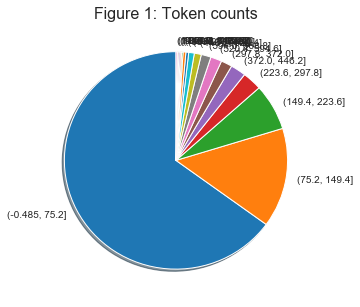

In [411]:
df_tokens.plot.pie(shadow=True, startangle=90, figsize=(5, 5))
plt.title('Figure 1: Token counts', fontsize=16)
plt.show()

- How about choosing top five categories? 

In [404]:
df_tokens_5 = df_eli_short.token_count.value_counts(bins=20).head(5)
df_tokens_5.name = ''
df_tokens_5

(-0.485, 75.2]    321
(75.2, 149.4]      73
(149.4, 223.6]     34
(223.6, 297.8]     14
(372.0, 446.2]     11
Name: , dtype: int64

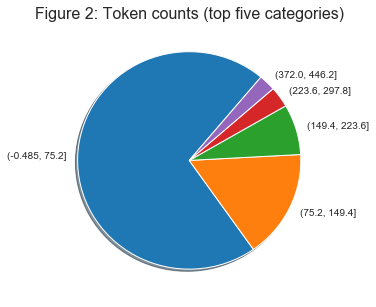

In [412]:
df_tokens_5.plot.pie(shadow=True, startangle=50, figsize=(5, 5))
plt.title('Figure 2: Token counts (top five categories)', fontsize=16)
plt.show()

### Summary

- Now, we know that the length of texts are not distributed well. Most of them are under 75 tokens.

### 2. Value count by native language
- Maybe we can do some simple analysis, such as native language, to help us look through the data.

In [337]:
df_native = df_eli_short.native_language.value_counts()
df_native

Arabic        117
Korean         96
Chinese        76
Japanese       30
Spanish        20
Thai           14
Turkish        14
Taiwanese       7
Portuguese      4
Other           4
French          4
Russian         3
Italian         3
Name: native_language, dtype: int64

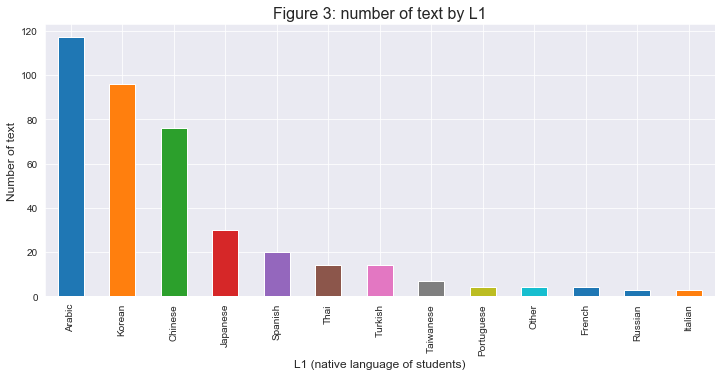

In [413]:
df_native.plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 3: number of text by L1', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('L1 (native language of students)', fontsize=12)
plt.ylabel('Number of text', fontsize=12)
plt.show()

- The output above is counted by text. We may want to look at the number of total students and the number of essay they write.
- Let's go through the data.

In [345]:
df_eli_short.student_id.value_counts().head(10)

ca4    4
cn9    4
dy7    4
ft2    4
bv2    4
da3    4
fp9    4
co4    3
bm3    3
bz5    3
Name: student_id, dtype: int64

In [342]:
df_eli_short.student_id.value_counts().describe()

count    342.000000
mean       1.444444
std        0.727436
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: student_id, dtype: float64

In [343]:
df_eli_short.student_id.describe()

count     494
unique    342
top       ca4
freq        4
Name: student_id, dtype: object

### Summary

- We can understand that there are 494 texts in the dataframe.
- These texts are written by 342 students.
- The max number of essays students wrote is 4.
- Students write 1.44 essay in average.